Реализация EDA. Визуализация на карте.

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt #черная тема на графиках
plt.style.use('dark_background')

In [ ]:
!pip install h3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.7 MB/s eta 0:00:00


In [ ]:
import h3

УСЛОВИЕ:

Поездка семьи из пяти человек в отпуск (5 дней).

Необходима аренда целого дома или отдельной квартиры с 2 спальнями

Минимизация затрат на аренду (стоимость за сутки не более 200,00)

Загрузка файлов для анализа - weekdays и weekends

In [ ]:
# Загружаем все таблицы в датафрэймы
amsterdam_weekdays = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/amsterdam_weekdays.csv')
amsterdam_weekends = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/amsterdam_weekends.csv')
athens_weekdays = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/athens_weekdays.csv')
athens_weekends = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/athens_weekends.csv')
barcelona_weekdays= pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/barcelona_weekdays.csv')
barcelona_weekends = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/barcelona_weekends.csv')
berlin_weekdays = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/berlin_weekdays.csv')
berlin_weekends = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/berlin_weekends.csv')
budapest_weekdays = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/budapest_weekdays.csv')
budapest_weekends = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/budapest_weekends.csv')
lisbon_weekdays = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/lisbon_weekdays.csv')
lisbon_weekends = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/lisbon_weekends.csv')
london_weekdays = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/london_weekdays.csv')
london_weekends = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/london_weekends.csv')
paris_weekdays = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/paris_weekdays.csv')
paris_weekends = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/paris_weekends.csv')
rome_weekdays = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/rome_weekdays.csv')
rome_weekends = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/rome_weekends.csv')
vienna_weekdays = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/vienna_weekdays.csv')
vienna_weekends = pd.read_csv('/content/drive/MyDrive/EDA/airbnb_data/vienna_weekends.csv')

In [ ]:
amsterdam_weekdays.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [ ]:
df = athens_weekdays
df.head(5)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,129.824479,Entire home/apt,False,False,4.0,False,0,0,10.0,100.0,2,2.813964,0.881890,55.348572,2.086871,78.778377,5.915160,23.76600,37.98300
1,1,138.963748,Entire home/apt,False,False,4.0,True,1,0,10.0,96.0,1,0.407293,0.304568,240.306654,9.060559,407.167696,30.572629,23.73168,37.97776
2,2,156.304923,Entire home/apt,False,False,3.0,True,0,1,10.0,98.0,1,1.237211,0.288488,199.507366,7.522257,395.967403,29.731642,23.72200,37.97900
3,3,91.627024,Entire home/apt,False,False,4.0,True,1,0,10.0,99.0,1,4.367457,0.297467,39.803047,1.500740,58.706578,4.408047,23.72712,38.01435
4,4,74.051508,Private room,False,True,2.0,False,0,0,10.0,100.0,1,2.194185,0.385266,78.733405,2.968577,113.325973,8.509204,23.73391,37.99529


Информация по каждому городу - количество предложений в weekdays и weekends

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2653 non-null   int64  
 1   realSum                     2653 non-null   float64
 2   room_type                   2653 non-null   object 
 3   room_shared                 2653 non-null   bool   
 4   room_private                2653 non-null   bool   
 5   person_capacity             2653 non-null   float64
 6   host_is_superhost           2653 non-null   bool   
 7   multi                       2653 non-null   int64  
 8   biz                         2653 non-null   int64  
 9   cleanliness_rating          2653 non-null   float64
 10  guest_satisfaction_overall  2653 non-null   float64
 11  bedrooms                    2653 non-null   int64  
 12  dist                        2653 non-null   float64
 13  metro_dist                  2653 

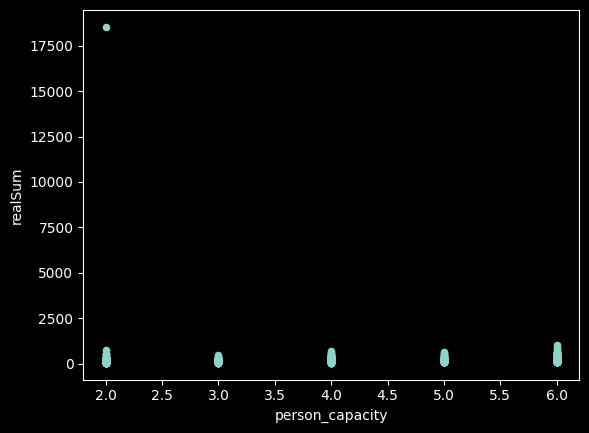

In [ ]:
df.plot('person_capacity', 'realSum', kind='scatter');

<Axes: >

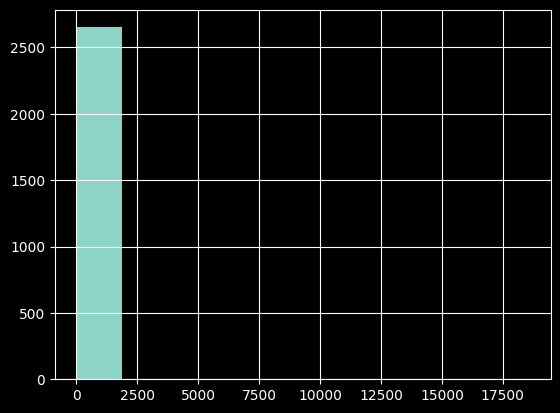

In [ ]:
df['realSum'].hist() # есть выбросы, поэтому нет понимания, есть ли интересующие нас варианты

In [ ]:
# Разбиваем на интервалы стоимоть аренды "Entire home/apt"
df['realSum'].value_counts(bins=40, sort=False)

,count
"(24.381, 505.448]",2626
"(505.448, 968.013]",25
"(968.013, 1430.577]",1
"(1430.577, 1893.141]",0
"(1893.141, 2355.705]",0
"(2355.705, 2818.269]",0
"(2818.269, 3280.833]",0
"(3280.833, 3743.397]",0
"(3743.397, 4205.962]",0
"(4205.962, 4668.526]",0


Исследуем показатели для того, чтобы понять, какие из них влияют на конечную цену и наш выбор:

по каким показателям будем фильтровать
по каким показателям будем составлять рейтинг

In [ ]:
unique_roome_type = df['room_type'].unique()
unique_roome_type # Варианты: отдельная комната, дом или квартира, совместное размещение

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [ ]:
df.groupby('room_type')['person_capacity'].value_counts() # Нет смысла рассматривать Shared room

room_type        person_capacity
Entire home/apt  4.0                945
                 2.0                512
                 3.0                383
                 6.0                314
                 5.0                293
Private room     2.0                139
                 3.0                 27
                 4.0                 24
                 6.0                  8
                 5.0                  3
Shared room      2.0                  4
                 4.0                  1
Name: count, dtype: int64

In [ ]:
df.groupby('room_type')['room_private'].value_counts() # показатель 'room_type' для нас не актуален

,,count
room_type,room_private,
Entire home/apt,False,2447
Private room,True,201
Shared room,False,5


In [ ]:
df.groupby('room_private')['person_capacity'].value_counts() # показатель не значим для нас

room_private  person_capacity
False         4.0                946
              2.0                516
              3.0                383
              6.0                314
              5.0                293
True          2.0                139
              3.0                 27
              4.0                 24
              6.0                  8
              5.0                  3
Name: count, dtype: int64

Создаем фильтры:
размещение Entire home/apt или Private room, цена 200, размещение 5 или 6 чел

In [ ]:
# Семье необходимо размещение в доме или квартире. Следовательно, интересует часть датасета с информацией о "Entire home/apt"
# c ценой до 200 у.е.
# размещение 5 или 6 человек
# 2 спальни

filter = ((df['room_type'] == 'Entire home/apt') |  (df['room_type'] == 'Private room')) & (df['realSum'] <= 200)  & ((df['person_capacity']==5)| (['person_capacity'] ==6)) & (df['bedrooms'] >= 2)
df_filter = df[filter]
df_filter

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
20,20,171.068357,Entire home/apt,False,False,5.0,True,0,1,10.0,98.0,2,1.728084,0.436666,150.529356,5.675582,220.932149,16.588930,23.71573,37.97573
21,21,158.413985,Entire home/apt,False,False,5.0,True,0,0,10.0,97.0,3,0.926725,0.336539,124.622679,4.698793,216.219060,16.235043,23.74500,37.97900
41,41,92.564385,Entire home/apt,False,False,5.0,False,0,0,9.0,93.0,2,2.303628,0.544408,73.662980,2.777400,107.761572,8.091395,23.73519,37.99631
45,45,190.049914,Entire home/apt,False,False,5.0,True,1,0,10.0,100.0,2,1.036298,0.802996,186.786722,7.042636,218.589063,16.412997,23.73547,37.96623
49,49,155.367563,Entire home/apt,False,False,5.0,True,1,0,10.0,97.0,2,0.277258,0.309056,199.087127,7.506412,319.235827,23.970169,23.73538,37.97806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2551,197.080121,Entire home/apt,False,False,5.0,True,0,0,10.0,98.0,2,1.503740,0.268780,176.184958,6.642905,207.102285,15.550500,23.72900,37.96300
2586,2586,81.081714,Entire home/apt,False,False,5.0,False,0,1,10.0,98.0,2,2.786126,1.117350,59.476605,2.242515,87.464290,6.567351,23.73914,38.00048
2596,2596,139.198088,Entire home/apt,False,False,5.0,False,0,0,10.0,100.0,3,1.247615,0.487179,113.060456,4.262849,151.287914,11.359617,23.74864,37.97153
2598,2598,162.163429,Entire home/apt,False,False,5.0,False,0,0,10.0,99.0,2,1.134834,1.110986,135.975976,5.126859,175.577926,13.183459,23.74106,37.96638


Подготавливаем данные для построения рейтинга: УДАЛЯЕМ КОЛОНКИ, которые не будут нами использоваться для проведения анализа

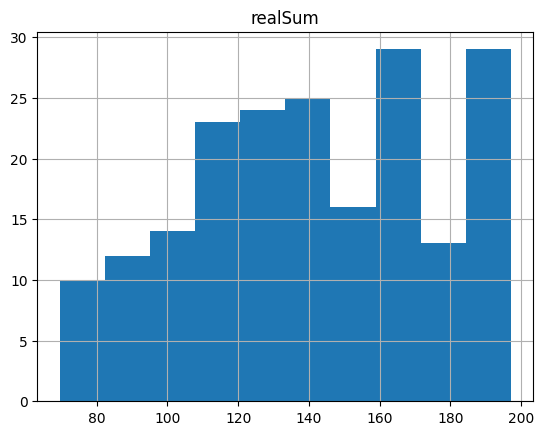

In [ ]:
df_filter.hist('realSum', bins=10);

In [ ]:
df_filter['realSum_bin'] = pd.cut(df_filter['realSum'],10)
df_filter

<ipython-input-12-d063f41a127a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['realSum_bin'] = pd.cut(df_filter['realSum'],10)


,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,realSum_bin
20,20,171.068357,Entire home/apt,False,False,5.0,True,0,1,10.0,...,2,1.728084,0.436666,150.529356,5.675582,220.932149,16.588930,23.71573,37.97573,"(158.836, 171.584]"
21,21,158.413985,Entire home/apt,False,False,5.0,True,0,0,10.0,...,3,0.926725,0.336539,124.622679,4.698793,216.219060,16.235043,23.74500,37.97900,"(146.088, 158.836]"
41,41,92.564385,Entire home/apt,False,False,5.0,False,0,0,9.0,...,2,2.303628,0.544408,73.662980,2.777400,107.761572,8.091395,23.73519,37.99631,"(82.347, 95.095]"
45,45,190.049914,Entire home/apt,False,False,5.0,True,1,0,10.0,...,2,1.036298,0.802996,186.786722,7.042636,218.589063,16.412997,23.73547,37.96623,"(184.332, 197.08]"
49,49,155.367563,Entire home/apt,False,False,5.0,True,1,0,10.0,...,2,0.277258,0.309056,199.087127,7.506412,319.235827,23.970169,23.73538,37.97806,"(146.088, 158.836]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2551,197.080121,Entire home/apt,False,False,5.0,True,0,0,10.0,...,2,1.503740,0.268780,176.184958,6.642905,207.102285,15.550500,23.72900,37.96300,"(184.332, 197.08]"
2586,2586,81.081714,Entire home/apt,False,False,5.0,False,0,1,10.0,...,2,2.786126,1.117350,59.476605,2.242515,87.464290,6.567351,23.73914,38.00048,"(69.472, 82.347]"
2596,2596,139.198088,Entire home/apt,False,False,5.0,False,0,0,10.0,...,3,1.247615,0.487179,113.060456,4.262849,151.287914,11.359617,23.74864,37.97153,"(133.34, 146.088]"
2598,2598,162.163429,Entire home/apt,False,False,5.0,False,0,0,10.0,...,2,1.134834,1.110986,135.975976,5.126859,175.577926,13.183459,23.74106,37.96638,"(158.836, 171.584]"


In [ ]:
df_filter.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'realSum_bin'],
      dtype='object')

In [ ]:
# Вывод списка колонок для удаления
columns = ['room_shared','room_private', 'multi', 'biz', 'attr_index_norm', 'rest_index_norm']

In [ ]:
# Удаляем колонки и перезаписываем текущий датасет
df_filter.drop(columns=columns, inplace=True)
df_filter.head(2)

<ipython-input-15-e6745026ec96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter.drop(columns=columns, inplace=True)


,Unnamed: 0,realSum,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,lng,lat,realSum_bin
20,20,171.068357,Entire home/apt,5.0,True,10.0,98.0,2,1.728084,0.436666,150.529356,220.932149,23.71573,37.97573,"(158.836, 171.584]"
21,21,158.413985,Entire home/apt,5.0,True,10.0,97.0,3,0.926725,0.336539,124.622679,216.219060,23.74500,37.97900,"(146.088, 158.836]"


In [ ]:
len(df_filter)

195

In [ ]:
df_filter.groupby('realSum_bin')['realSum'].count()

<ipython-input-17-6cc42bf9ab43>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filter.groupby('realSum_bin')['realSum'].count()


,realSum
realSum_bin,
"(69.472, 82.347]",10
"(82.347, 95.095]",12
"(95.095, 107.843]",14
"(107.843, 120.591]",23
"(120.591, 133.34]",27
"(133.34, 146.088]",22
"(146.088, 158.836]",16
"(158.836, 171.584]",29
"(171.584, 184.332]",13


<ipython-input-18-096da23a2a18>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filter.groupby('realSum_bin')['attr_index'].agg('mean').hist()


<Axes: >

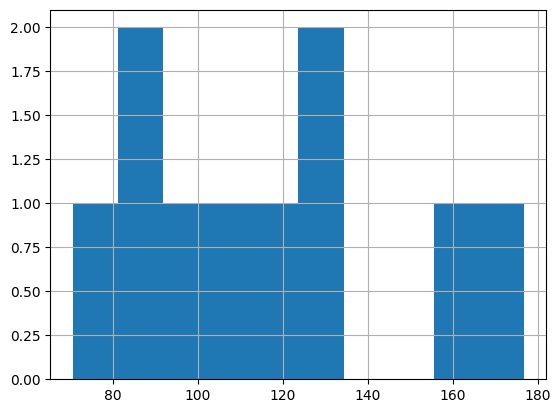

In [ ]:
df_filter.groupby('realSum_bin')['attr_index'].agg('mean').hist()

<ipython-input-19-9afe33d598bb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filter.groupby('realSum_bin')['metro_dist'].mean().hist()


<Axes: >

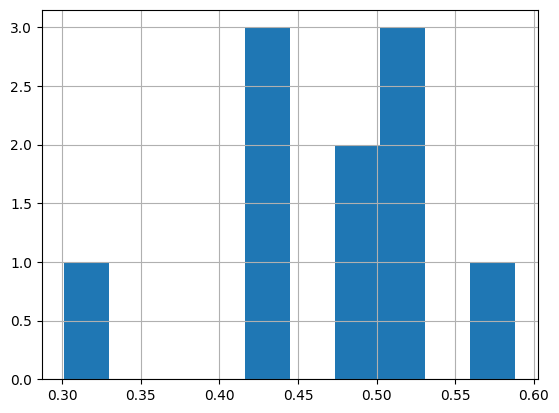

In [ ]:
df_filter.groupby('realSum_bin')['metro_dist'].mean().hist()

Построение рейтинга

In [ ]:
features_r=('person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall','bedrooms', 'attr_index','rest_index') # показатели, чем ВЫШЕ значение, тем лучше
features_unr=('realSum', 'dist', 'metro_dist')  # показатели, чем НИЖЕ значение, тем лучше

In [ ]:
for f in features_r:
  print(f)
  df_filter[f'{f}_pct'] = df_filter[f].rank(pct=True,method='max')

person_capacity
cleanliness_rating
guest_satisfaction_overall
bedrooms
attr_index
rest_index


<ipython-input-21-6800fdeca2fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter[f'{f}_pct'] = df_filter[f].rank(pct=True,method='max')
<ipython-input-21-6800fdeca2fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter[f'{f}_pct'] = df_filter[f].rank(pct=True,method='max')
<ipython-input-21-6800fdeca2fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:
for f in features_unr:
  print(f)
  df_filter[f'{f}_pct'] = df_filter[f].rank(pct=True,method='max', ascending = False)

realSum
dist
metro_dist


<ipython-input-22-521654951568>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter[f'{f}_pct'] = df_filter[f].rank(pct=True,method='max', ascending = False)
<ipython-input-22-521654951568>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter[f'{f}_pct'] = df_filter[f].rank(pct=True,method='max', ascending = False)
<ipython-input-22-521654951568>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
len(df_filter)

195

In [ ]:
df_filter

,Unnamed: 0,realSum,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,...,realSum_bin,person_capacity_pct,cleanliness_rating_pct,guest_satisfaction_overall_pct,bedrooms_pct,attr_index_pct,rest_index_pct,realSum_pct,dist_pct,metro_dist_pct
20,20,171.068357,Entire home/apt,5.0,True,10.0,98.0,2,1.728084,0.436666,...,"(158.836, 171.584]",1.0,1.0,0.564103,0.933333,0.779487,0.810256,0.220513,0.584615,0.466667
21,21,158.413985,Entire home/apt,5.0,True,10.0,97.0,3,0.926725,0.336539,...,"(146.088, 158.836]",1.0,1.0,0.487179,1.000000,0.625641,0.800000,0.369231,0.953846,0.651282
41,41,92.564385,Entire home/apt,5.0,False,9.0,93.0,2,2.303628,0.544408,...,"(82.347, 95.095]",1.0,0.2,0.235897,0.933333,0.271795,0.271795,0.907692,0.302564,0.338462
45,45,190.049914,Entire home/apt,5.0,True,10.0,100.0,2,1.036298,0.802996,...,"(184.332, 197.08]",1.0,1.0,1.000000,0.933333,0.882051,0.805128,0.097436,0.923077,0.117949
49,49,155.367563,Entire home/apt,5.0,True,10.0,97.0,2,0.277258,0.309056,...,"(146.088, 158.836]",1.0,1.0,0.487179,0.933333,0.897436,0.933333,0.394872,1.000000,0.697436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2551,197.080121,Entire home/apt,5.0,True,10.0,98.0,2,1.503740,0.268780,...,"(184.332, 197.08]",1.0,1.0,0.564103,0.933333,0.856410,0.764103,0.020513,0.707692,0.774359
2586,2586,81.081714,Entire home/apt,5.0,False,10.0,98.0,2,2.786126,1.117350,...,"(69.472, 82.347]",1.0,1.0,0.564103,0.933333,0.179487,0.179487,0.969231,0.184615,0.025641
2596,2596,139.198088,Entire home/apt,5.0,False,10.0,100.0,3,1.247615,0.487179,...,"(133.34, 146.088]",1.0,1.0,1.000000,1.000000,0.558974,0.497436,0.492308,0.820513,0.389744
2598,2598,162.163429,Entire home/apt,5.0,False,10.0,99.0,2,1.134834,1.110986,...,"(158.836, 171.584]",1.0,1.0,0.651282,0.933333,0.717949,0.646154,0.328205,0.861538,0.030769


In [ ]:
df_filter['host_is_superhost'].value_counts()

,count
host_is_superhost,
False,111
True,84


In [ ]:
df_filter['host_is_superhost']=df_filter['host_is_superhost'].astype(int)

<ipython-input-26-8e8242d271ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['host_is_superhost']=df_filter['host_is_superhost'].astype(int)


In [ ]:
df_filter

,Unnamed: 0,realSum,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,...,realSum_bin,person_capacity_pct,cleanliness_rating_pct,guest_satisfaction_overall_pct,bedrooms_pct,attr_index_pct,rest_index_pct,realSum_pct,dist_pct,metro_dist_pct
20,20,171.068357,Entire home/apt,5.0,1,10.0,98.0,2,1.728084,0.436666,...,"(158.836, 171.584]",1.0,1.0,0.564103,0.933333,0.779487,0.810256,0.220513,0.584615,0.466667
21,21,158.413985,Entire home/apt,5.0,1,10.0,97.0,3,0.926725,0.336539,...,"(146.088, 158.836]",1.0,1.0,0.487179,1.000000,0.625641,0.800000,0.369231,0.953846,0.651282
41,41,92.564385,Entire home/apt,5.0,0,9.0,93.0,2,2.303628,0.544408,...,"(82.347, 95.095]",1.0,0.2,0.235897,0.933333,0.271795,0.271795,0.907692,0.302564,0.338462
45,45,190.049914,Entire home/apt,5.0,1,10.0,100.0,2,1.036298,0.802996,...,"(184.332, 197.08]",1.0,1.0,1.000000,0.933333,0.882051,0.805128,0.097436,0.923077,0.117949
49,49,155.367563,Entire home/apt,5.0,1,10.0,97.0,2,0.277258,0.309056,...,"(146.088, 158.836]",1.0,1.0,0.487179,0.933333,0.897436,0.933333,0.394872,1.000000,0.697436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2551,197.080121,Entire home/apt,5.0,1,10.0,98.0,2,1.503740,0.268780,...,"(184.332, 197.08]",1.0,1.0,0.564103,0.933333,0.856410,0.764103,0.020513,0.707692,0.774359
2586,2586,81.081714,Entire home/apt,5.0,0,10.0,98.0,2,2.786126,1.117350,...,"(69.472, 82.347]",1.0,1.0,0.564103,0.933333,0.179487,0.179487,0.969231,0.184615,0.025641
2596,2596,139.198088,Entire home/apt,5.0,0,10.0,100.0,3,1.247615,0.487179,...,"(133.34, 146.088]",1.0,1.0,1.000000,1.000000,0.558974,0.497436,0.492308,0.820513,0.389744
2598,2598,162.163429,Entire home/apt,5.0,0,10.0,99.0,2,1.134834,1.110986,...,"(158.836, 171.584]",1.0,1.0,0.651282,0.933333,0.717949,0.646154,0.328205,0.861538,0.030769


In [ ]:
df_filter['score'] = df_filter[['person_capacity_pct',
       'cleanliness_rating_pct', 'guest_satisfaction_overall_pct',
       'bedrooms_pct', 'attr_index_pct', 'rest_index_pct', 'realSum_pct',
       'dist_pct', 'metro_dist_pct']].sum(axis=1)

<ipython-input-27-650132e55bec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['score'] = df_filter[['person_capacity_pct',


Получаем итоговый рейтинг:

In [ ]:
df_filter = df_filter.sort_values('score', ascending=False)
df_filter

,Unnamed: 0,realSum,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,...,person_capacity_pct,cleanliness_rating_pct,guest_satisfaction_overall_pct,bedrooms_pct,attr_index_pct,rest_index_pct,realSum_pct,dist_pct,metro_dist_pct,score
2261,2261,172.708739,Entire home/apt,5.0,1,10.0,100.0,2,1.255197,0.197385,...,1.0,1.000000,1.000000,0.933333,0.948718,0.938462,0.215385,0.815385,0.882051,7.733333
2086,2086,136.854686,Entire home/apt,5.0,1,10.0,100.0,2,1.542071,0.235204,...,1.0,1.000000,1.000000,0.933333,0.902564,0.851282,0.543590,0.671795,0.825641,7.728205
1421,1421,121.856912,Entire home/apt,5.0,0,10.0,100.0,2,1.161661,0.620517,...,1.0,1.000000,1.000000,0.933333,0.984615,0.943590,0.687179,0.846154,0.251282,7.646154
1223,1223,167.553254,Entire home/apt,5.0,1,10.0,100.0,2,0.479492,0.453112,...,1.0,1.000000,1.000000,0.933333,0.974359,0.989744,0.261538,0.979487,0.420513,7.558974
690,690,185.363110,Entire home/apt,5.0,1,10.0,100.0,2,0.502594,0.405984,...,1.0,1.000000,1.000000,0.933333,0.979487,0.994872,0.138462,0.974359,0.523077,7.543590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,1502,138.963748,Entire home/apt,5.0,1,8.0,80.0,2,2.274344,0.801814,...,1.0,0.056410,0.061538,0.933333,0.261538,0.256410,0.523077,0.307692,0.123077,3.523077
533,533,90.455323,Entire home/apt,5.0,0,7.0,90.0,2,2.873640,1.195963,...,1.0,0.010256,0.143590,0.933333,0.158974,0.174359,0.923077,0.158974,0.010256,3.512821
2432,2432,102.172334,Entire home/apt,5.0,0,8.0,50.0,2,3.063832,0.617754,...,1.0,0.056410,0.010256,0.933333,0.123077,0.097436,0.861538,0.138462,0.256410,3.476923
95,95,175.052141,Entire home/apt,5.0,0,8.0,90.0,2,2.686823,0.388976,...,1.0,0.056410,0.143590,0.933333,0.169231,0.184615,0.174359,0.215385,0.553846,3.430769


Берем для анализа только отдельные колонки:

Визуализируем

In [ ]:
import h3
lat, lng = 37.769377, -122.388903
resolution = 9
h3.latlng_to_cell(lat, lng, resolution)

'89283082e73ffff'

In [ ]:
def get_geksagon(row):
  return h3.latlng_to_cell(row['lat'], row['lng'], 8)

In [ ]:
df_filter['geksagon'] = df_filter.apply(get_geksagon,axis=1)

In [ ]:
geksagon = df_filter['geksagon'].value_counts().reset_index()
geksagon

,geksagon,count
0,881eda75ddfffff,26
1,881eda7415fffff,13
2,881eda74e7fffff,12
3,881eda75d9fffff,11
4,881eda7411fffff,11
5,881eda743bfffff,11
6,881eda74c7fffff,8
7,881eda74ebfffff,8
8,881eda74edfffff,8
9,881eda7431fffff,7


In [ ]:
len(df_filter)

195

In [ ]:
geksagon['count'].sum()

195

In [ ]:
(geksagon['count'].cumsum() / geksagon['count'].sum()).head(30)

,count
0,0.133333
1,0.200000
2,0.261538
3,0.317949
4,0.374359
5,0.430769
6,0.471795
7,0.512821
8,0.553846
9,0.589744


17 кегсагонов содержат 80% вариантов

In [ ]:
loc = df_filter[df_filter['geksagon'] == '881eda75ddfffff'][['lat','lng']].iloc[2].values
loc

array([37.96645, 23.72422])

In [ ]:
import folium


m = folium.Map(location = loc,
               zoom_start = 15)

In [ ]:
max_rate=df_filter['score'].max()
max_rate

7.733333333333334

In [ ]:
markers = df_filter[['lat','lng','score']].values

In [ ]:
for marker in markers:
  color = 'blue'
  if marker[2] > max_rate*0.8:
    color = 'red'

  folium.CircleMarker(
    location=[marker[0], marker[1]],
    radius=1,
    fill=True, # Set fill to True
    fill_color=color,
    color = color,
).add_to(m)

In [ ]:
m

In [ ]:
# Берем для анализа только отдельные колонки:
df_final = df_filter[['realSum', 'score', 'person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall','bedrooms', 'attr_index','rest_index', 'dist', 'metro_dist']]
# Сортируем по колонке total_rating в порядке убывания
df_final.sort_values(by='score', ascending=False)

,realSum,score,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,attr_index,rest_index,dist,metro_dist
2261,172.708739,7.733333,5.0,10.0,100.0,2,289.057310,321.817830,1.255197,0.197385
2086,136.854686,7.728205,5.0,10.0,100.0,2,204.907454,239.599104,1.542071,0.235204
1421,121.856912,7.646154,5.0,10.0,100.0,2,388.863780,341.806529,1.161661,0.620517
1223,167.553254,7.558974,5.0,10.0,100.0,2,344.679948,522.390571,0.479492,0.453112
690,185.363110,7.543590,5.0,10.0,100.0,2,381.260860,549.871661,0.502594,0.405984
...,...,...,...,...,...,...,...,...,...,...
1502,138.963748,3.523077,5.0,8.0,80.0,2,72.104364,104.735638,2.274344,0.801814
533,90.455323,3.512821,5.0,7.0,90.0,2,57.706915,85.328221,2.873640,1.195963
2432,102.172334,3.476923,5.0,8.0,50.0,2,51.886649,74.298218,3.063832,0.617754
95,175.052141,3.430769,5.0,8.0,90.0,2,58.576270,88.509663,2.686823,0.388976


Выбираем объекты с высокм рейтингом - выше 4.5 и сортируем их по убыванию total_rating.
Если объектов, удовлетворяющих нашим устовиям мало (1-2) их можно не рассмотривать

In [ ]:
filter = df_final['score'] > 7
df_final[filter].sort_values(by='score', ascending=False)

# Количество предложений - 12

,realSum,score,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,attr_index,rest_index,dist,metro_dist
2261,172.708739,7.733333,5.0,10.0,100.0,2,289.057310,321.817830,1.255197,0.197385
2086,136.854686,7.728205,5.0,10.0,100.0,2,204.907454,239.599104,1.542071,0.235204
1421,121.856912,7.646154,5.0,10.0,100.0,2,388.863780,341.806529,1.161661,0.620517
1223,167.553254,7.558974,5.0,10.0,100.0,2,344.679948,522.390571,0.479492,0.453112
690,185.363110,7.543590,5.0,10.0,100.0,2,381.260860,549.871661,0.502594,0.405984
941,115.998406,7.528205,5.0,10.0,100.0,2,114.463479,193.516439,1.627793,0.190409
1917,145.993954,7.482051,5.0,10.0,100.0,2,123.552374,210.202865,0.954356,0.279149
2340,197.080121,7.430769,5.0,10.0,100.0,2,318.837231,480.590164,0.424137,0.395995
2102,154.195862,7.394872,5.0,10.0,100.0,2,181.479826,382.886405,1.149779,0.524085
1488,125.137675,7.384615,5.0,10.0,97.0,2,434.453208,370.711208,1.137885,0.413574


Находим полные данные по объектам   по  индексам строк из исходных датасетов .

Т.е. у нас есть варианты, удвлетворяющие нашим запросам (условиям).

Можно созваниваться (свободен или занят ) и бронировать)))

In [ ]:
# Находим первоначальные данные по индексам строк:

indexes_best_offers = [2261, 2086, 1421]

# Использум  .loc[] для поиска строк по индексам
df.loc[indexes_best_offers]

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
2261,2261,172.708739,Entire home/apt,False,False,5.0,True,0,1,10.0,100.0,2,1.255197,0.197385,289.057310,10.898662,321.817830,24.164041,23.72800,37.96589
2086,2086,136.854686,Entire home/apt,False,False,5.0,True,0,0,10.0,100.0,2,1.542071,0.235204,204.907454,7.725862,239.599104,17.990559,23.72400,37.96500
1421,1421,121.856912,Entire home/apt,False,False,5.0,False,1,0,10.0,100.0,2,1.161661,0.620517,388.863780,14.661780,341.806529,25.664914,23.72436,37.96980
